In [ ]:
#Import các thư viện :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_data = '/content/drive/MyDrive/Machine Learning/Data.csv'
df = pd.read_csv(path_data)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
#Lấy tên các cột trong dataframe :
cols = df.columns
print(f"Tên các cột : {cols}")

Tên các cột : Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [5]:
#Loại bỏ dữ liệu trùng lắp :
df = df.drop_duplicates()
#Loại bỏ dữ liệu bị null :
df = df.dropna()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [7]:
#Gọi thư viện LabelEncoder :
from sklearn.preprocessing import LabelEncoder

#Khởi tạo đối tượng :
label_encoder = LabelEncoder()

#Lọc ra dữ liệu dạng chuỗi và lấy tên các cột trong có dữ liệu dạng chuỗi :
data_string_cols = df.select_dtypes(exclude=[np.number]).columns
print(data_string_cols)
print(df[data_string_cols].head())

Index(['gender', 'smoking_history'], dtype='object')
   gender smoking_history
0  Female           never
1  Female         No Info
2    Male           never
3  Female         current
4    Male         current


In [8]:
#Dùng phương thức fit_transform của đối tượng label_encoder đã khai báo ở trên :
#Để thực hiện việc chuẩn hoá dữ liệu dạng chuỗi thành số :
for col in data_string_cols:
  df[col] = label_encoder.fit_transform(df[col])

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


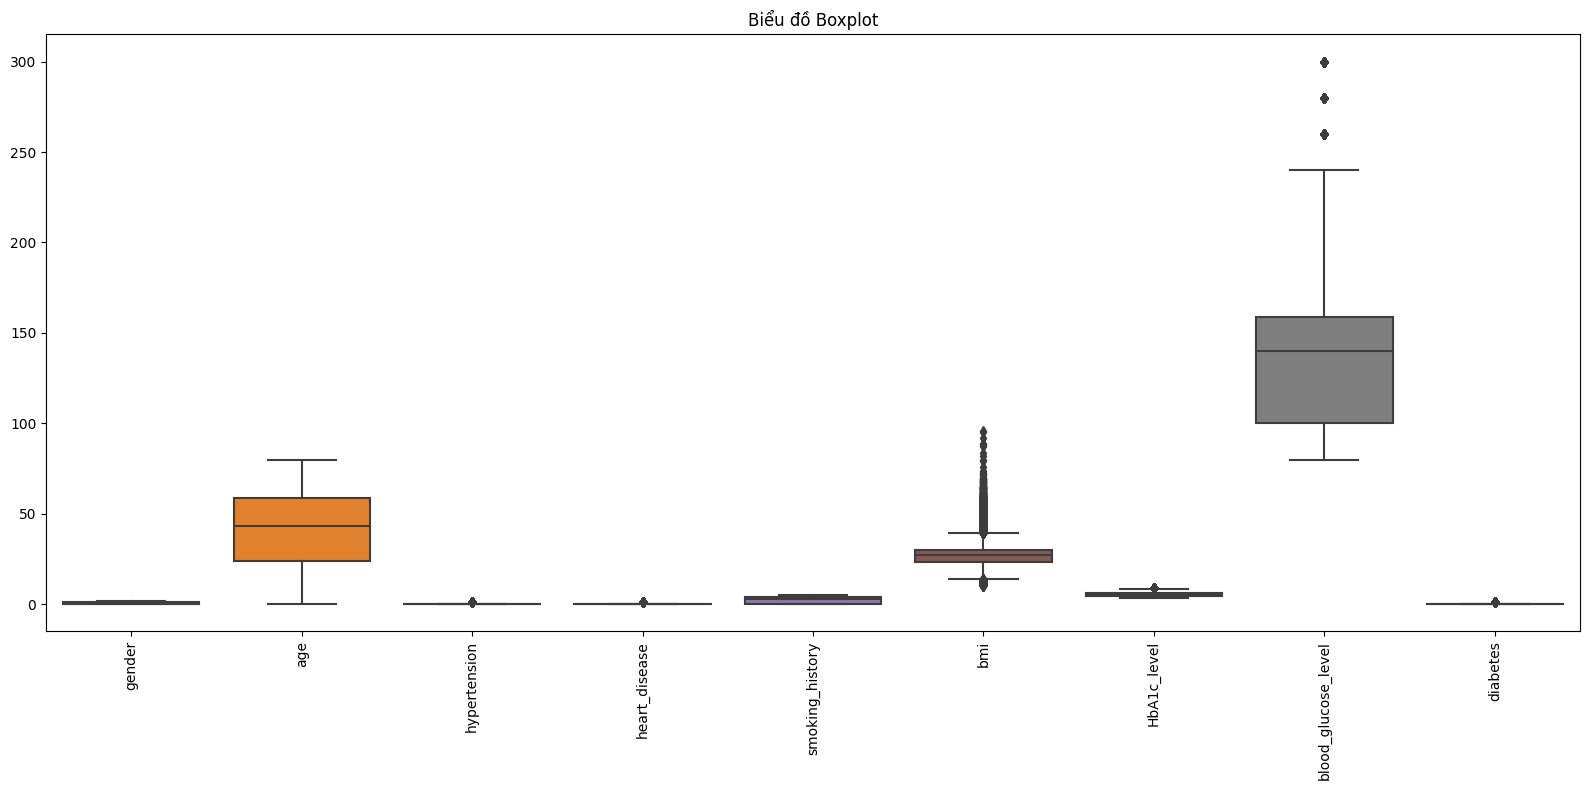

In [9]:
#Thực hiện kiểm tra các giá trị ngoại biên và loại bỏ nó :
#Dùng seaborn để xem thử các giá trị ngoại biên :
#Tạo lưới subplot 1 hàng và 2 cột :
plt.figure(figsize=(16, 8))

#Biểu đồ Boxplot của df :
sns.boxplot(data=df)
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.title("Biểu đồ Boxplot")

#Hiển thị biểu đồ :
plt.tight_layout()
plt.show()

In [10]:
#Phân vị thứ nhất tương ứng với giá trị ở vị trí thứ 25% của mẫu dữ liệu :
q1 = df.quantile(0.25)

#Phân vị thứ ba tương ứng với giá trị ở vị trí thứ 75% của mẫu dữ liệu :
q3 = df.quantile(0.75)

#Tính IQR (Khoảng tứ phân vị) :
iqr = q3 - q1

iqr

gender                  1.00
age                    35.00
hypertension            0.00
heart_disease           0.00
smoking_history         4.00
bmi                     6.46
HbA1c_level             1.40
blood_glucose_level    59.00
diabetes                0.00
dtype: float64

In [11]:
df_hypertension	= df['hypertension'].unique()
df_heart	= df['heart_disease'].unique()
df_diabetes	= df['diabetes'].unique()
print(df_hypertension)
print(df_heart)
print(df_diabetes)

[0 1]
[1 0]
[0 1]


In [12]:
iqr['heart_disease'] = iqr['heart_disease'] + 1
iqr['hypertension'] = iqr['hypertension'] + 1
iqr['diabetes'] = iqr['diabetes'] + 1

iqr

gender                  1.00
age                    35.00
hypertension            1.00
heart_disease           1.00
smoking_history         4.00
bmi                     6.46
HbA1c_level             1.40
blood_glucose_level    59.00
diabetes                1.00
dtype: float64

In [13]:
#Tính biên dưới và biên trên :
bien_duoi = q1 - 1.5*iqr
bien_tren = q3 + 1.5*iqr


#Loại bỏ các giá trị nằm phía dưới biên dưới hoặc nằm phía trên biên trên :
#Dùng mệnh đề phũ đinh ~ any để loại bỏ :
df_no_outlier = df[~((df < bien_duoi) |
                              (df > bien_tren))
                              .any(axis = 1)]


df_no_outlier

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


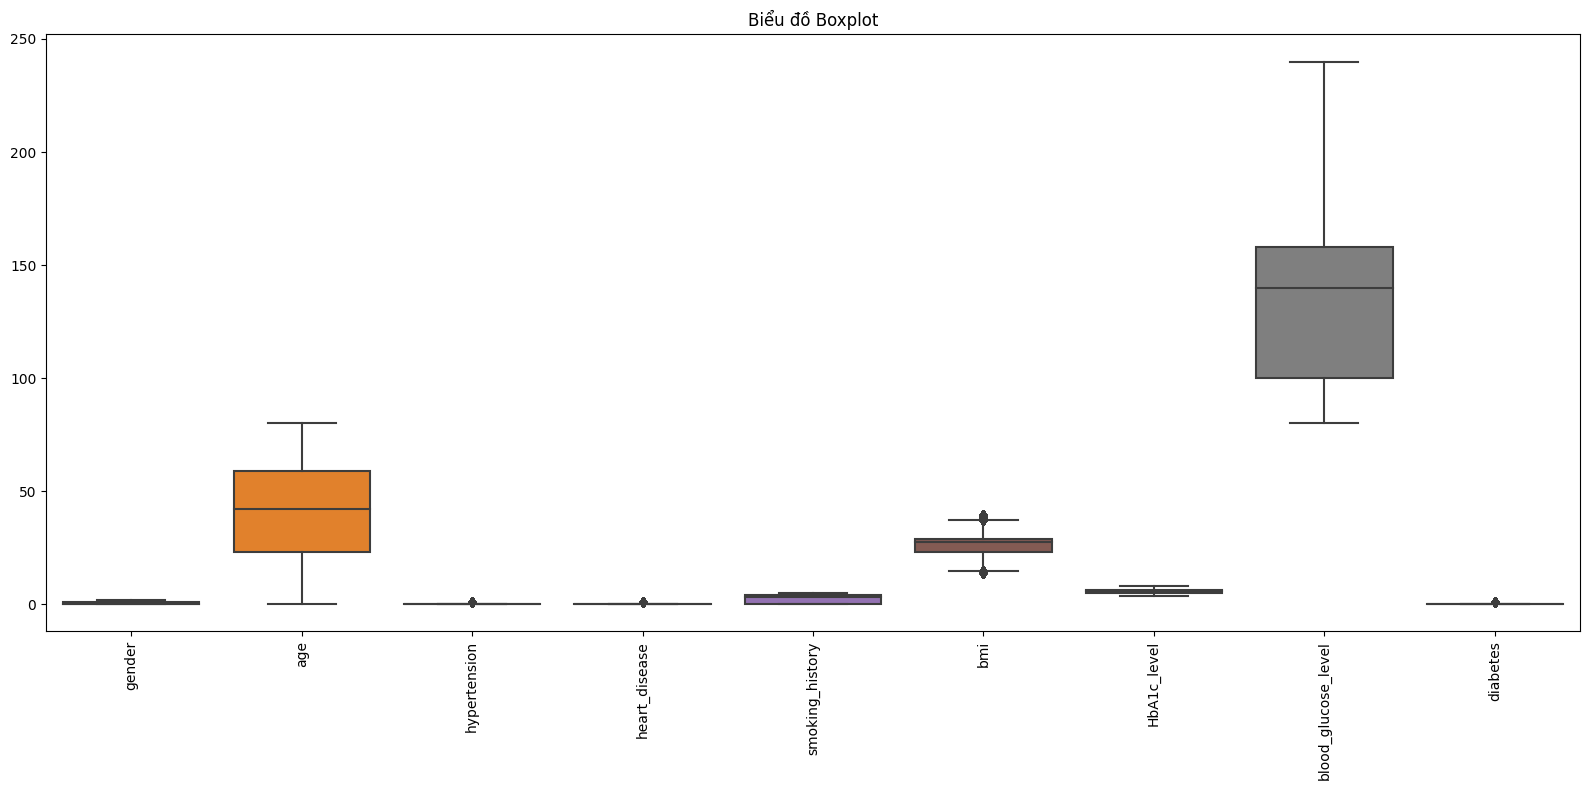

In [14]:
#Hiển thị lại :
#Tạo lưới subplot 1 hàng và 2 cột :
plt.figure(figsize=(16, 8))

#Biểu đồ Boxplot cho df_1 :
sns.boxplot(data=df_no_outlier)
plt.xticks(range(len(df_no_outlier.columns)), df_no_outlier.columns, rotation=90)
plt.title("Biểu đồ Boxplot")


#Hiển thị biểu đồ :
plt.tight_layout()
plt.show()

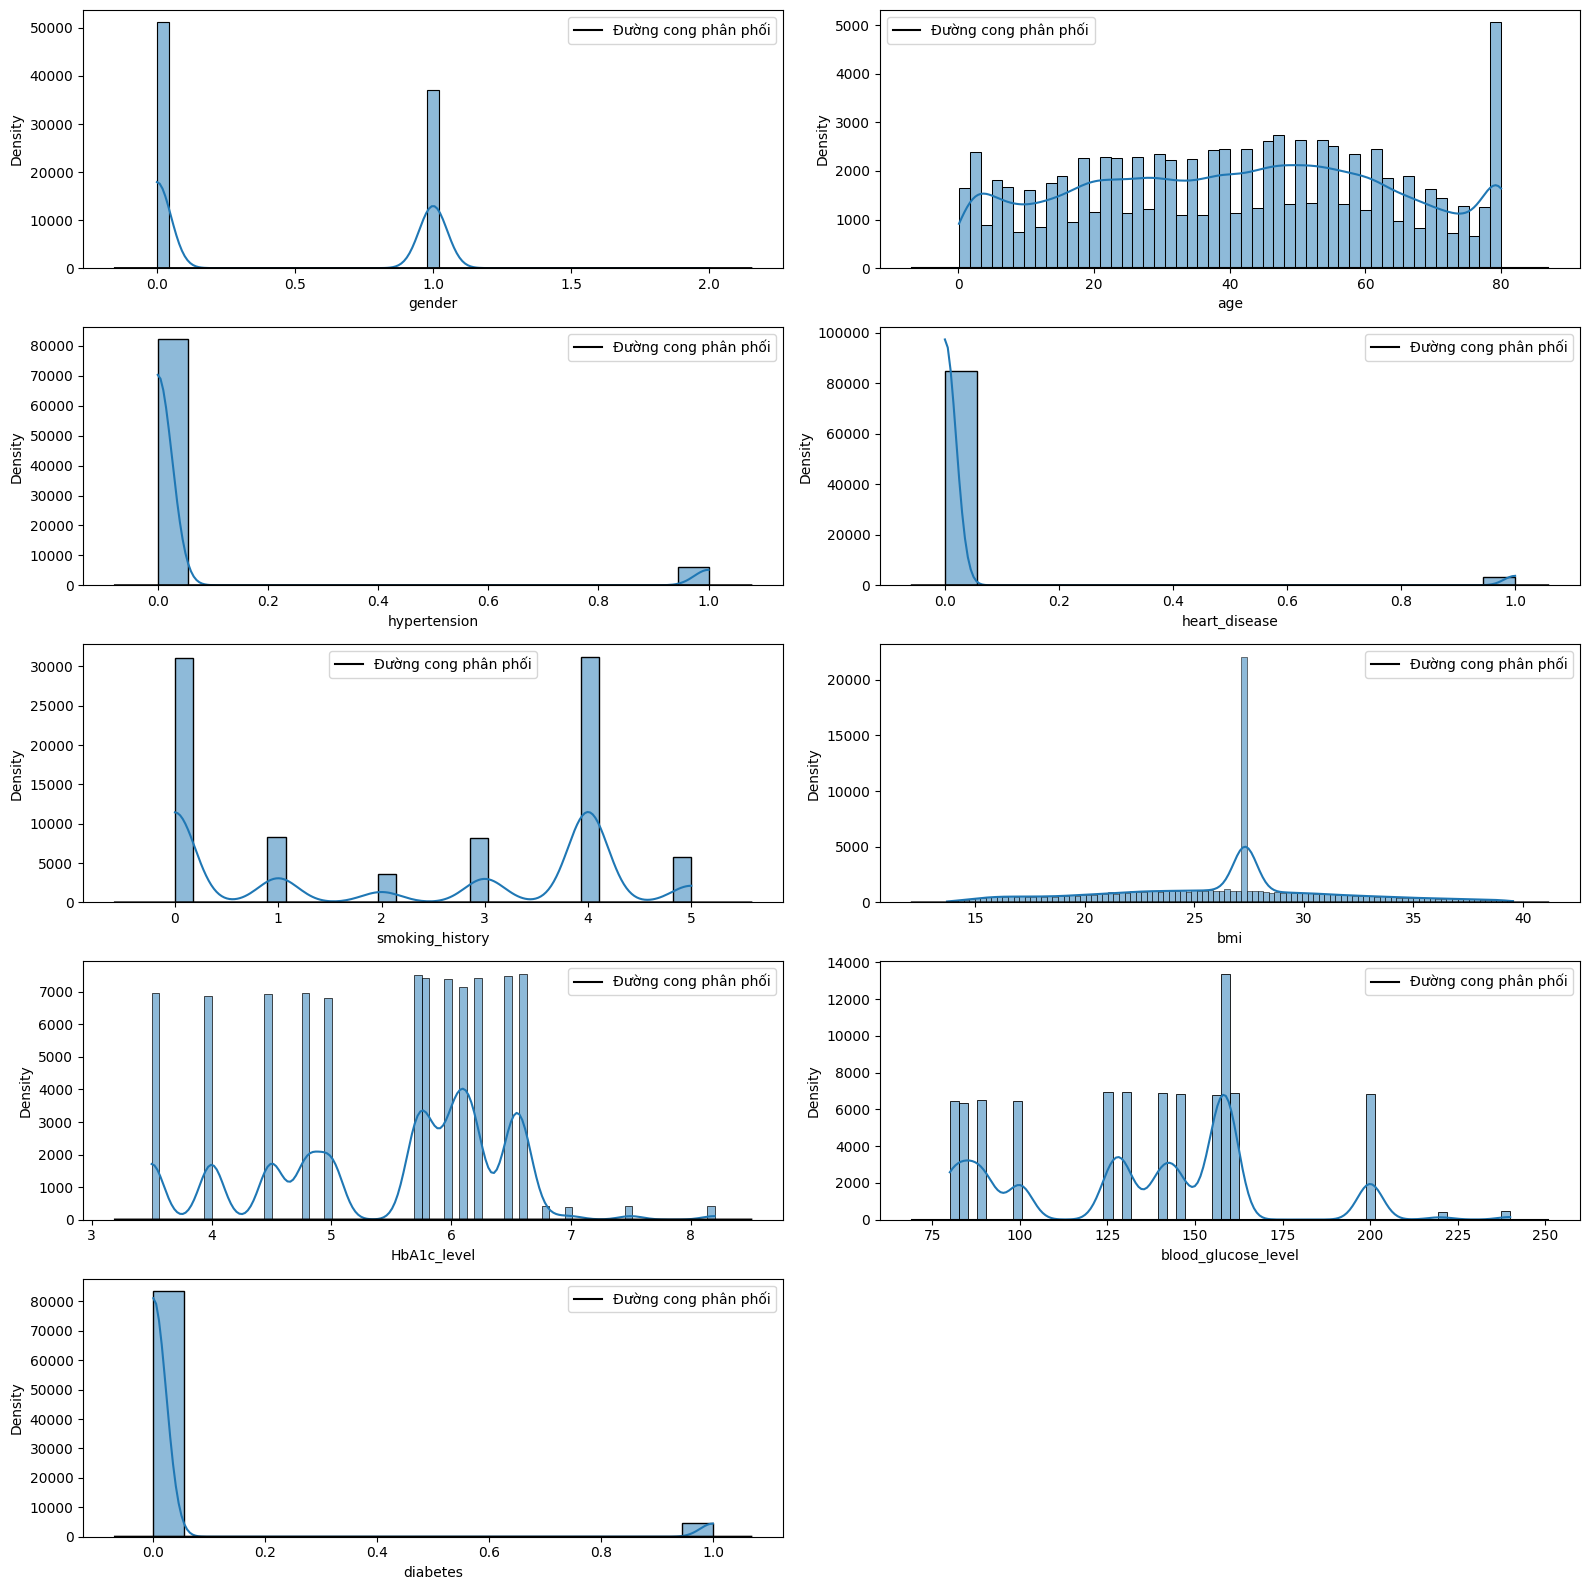

In [15]:
#Dùng biểu đồ phân phối xác suất để xem sự phân phối tần suất của từng đặc trưng :
#Số lượng đặc trưng cần vẽ biểu đồ :
number_features = len(df_no_outlier.columns)

#Thiết lập kích thước grid cho subplot :
#Tạo một grid có 2 cột (có thể thay đổi số cột tùy theo số đặc trưng) :
cols = 2
rows = number_features // cols + 1

#Tạo một figure với kích thước phù hợp với số lượng biểu đồ :
plt.figure(figsize=(16, 16))

#Lặp qua từng đặc trưng và vẽ biểu đồ histogram và đường phân phối chuẩn (KDE) :
for i, feature in enumerate(df_no_outlier.columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=df_no_outlier, x=feature, kde=True)
    sns.kdeplot(df_no_outlier[feature], color='black', linestyle='-', label='Đường cong phân phối')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Tách biến phụ thuộc ra khỏi tập dữ liệu :
X = df_no_outlier.drop('diabetes', axis=1)
y = df_no_outlier['diabetes']


#Chuẩn hóa dữ liệu tập (Dùng Min - Max Scaler) :
scaler = StandardScaler()
for col in X.columns :
  X[[col]] = scaler.fit_transform(X[[col]])


#Tách tập dữ liệu thành 2 phần (1 phần để train và 1 phần để test) :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
36245,1.174372,-1.734788,-0.271073,-0.195664,-1.163514,-1.578018,1.146171,0.577776
13228,-0.850095,-0.844157,-0.271073,-0.195664,-1.163514,1.603076,1.045702,0.294133
48502,1.174372,1.103546,-0.271073,-0.195664,0.425446,0.303810,-0.461345,0.294133
2195,-0.850095,-0.180167,-0.271073,-0.195664,-0.633860,-0.644769,-1.968392,1.854166
3998,1.174372,1.413407,-0.271073,-0.195664,0.955100,1.978675,-0.963694,-0.244787
...,...,...,...,...,...,...,...,...
6214,-0.850095,-0.578561,-0.271073,-0.195664,0.425446,-0.673514,-0.461345,0.719597
82867,-0.850095,-1.789678,-0.271073,-0.195664,0.955100,-2.233400,0.543353,0.691233
94219,1.174372,0.793684,-0.271073,-0.195664,0.955100,0.495442,0.342413,-1.407720
94433,1.174372,0.882216,-0.271073,-0.195664,1.484753,0.140923,-1.968392,-1.407720


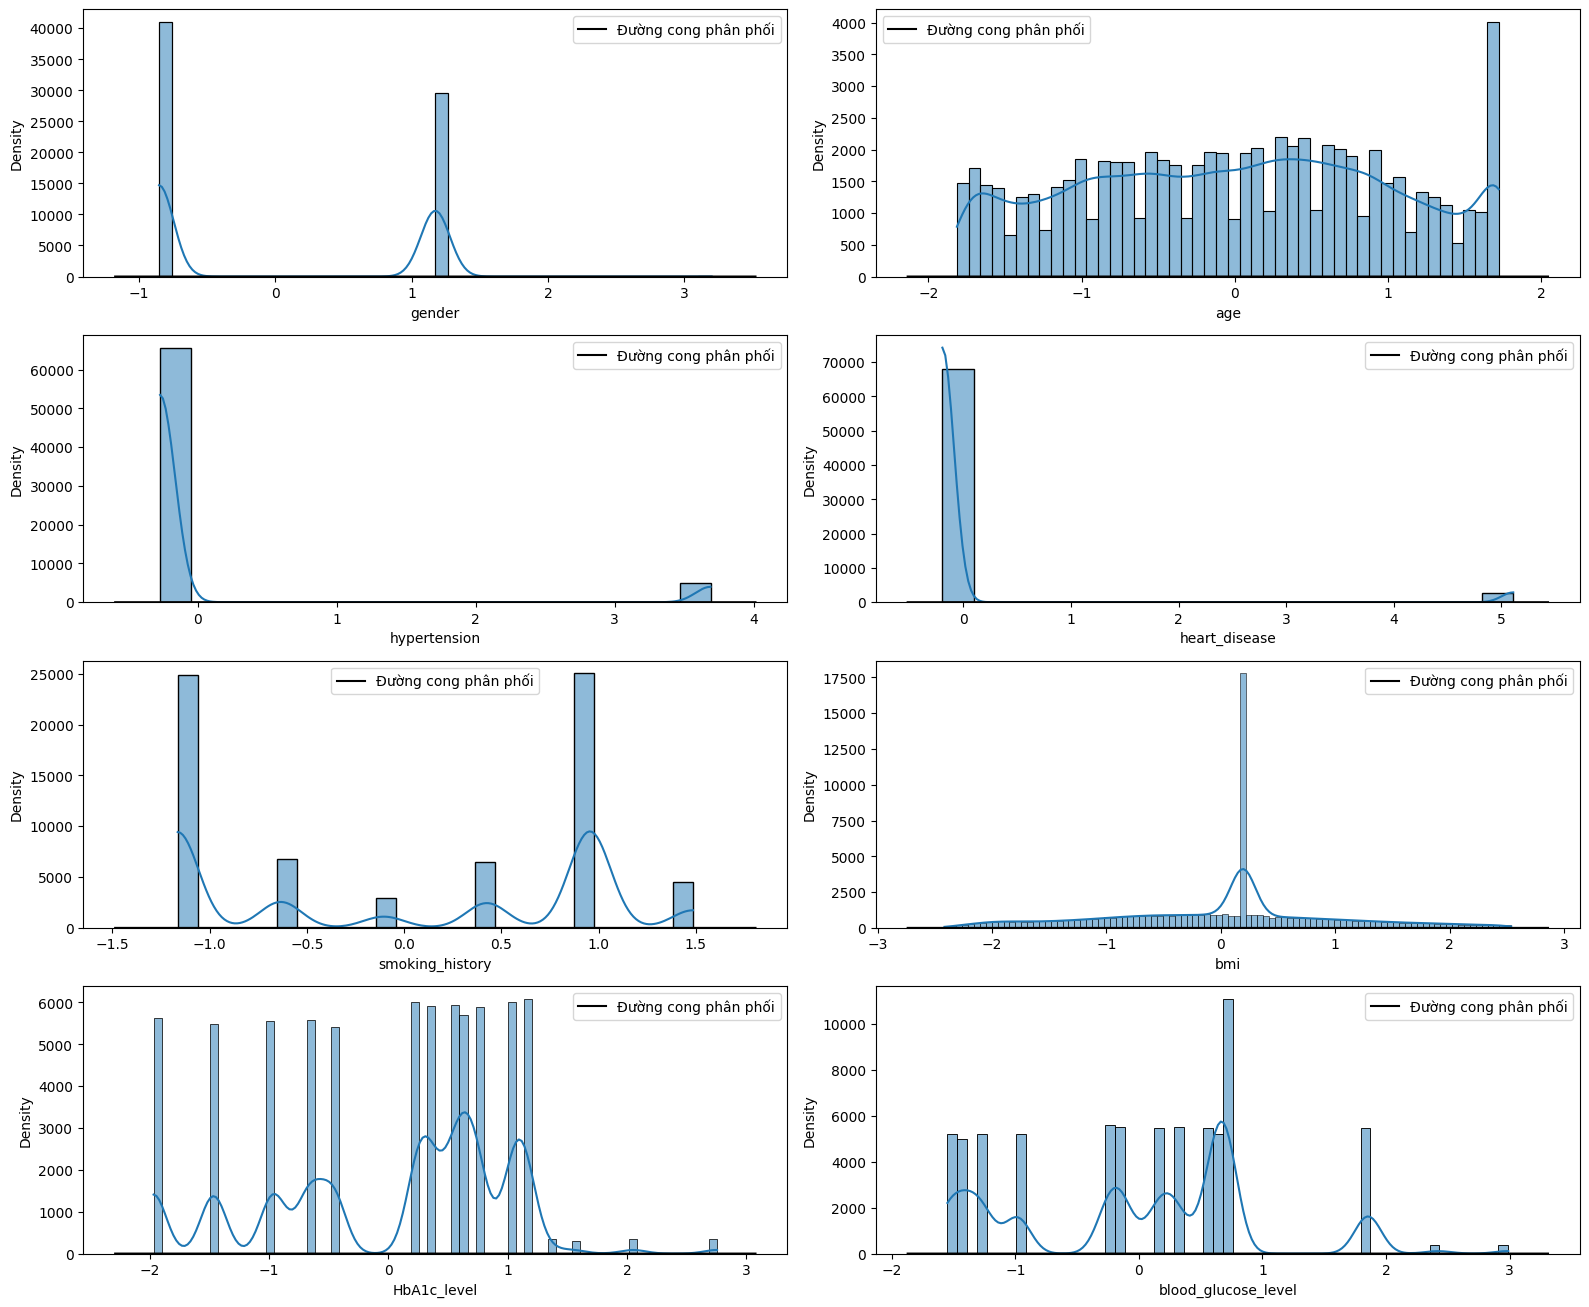

In [19]:
#Hiển thị lại biểu đồ Histogram sau khi chuẩn hóa :
#Số lượng đặc trưng cần vẽ biểu đồ :
number_x_features = len(X_train.columns)

#Thiết lập kích thước grid cho subplot :
#Tạo một grid có 2 cột (có thể thay đổi số cột tùy theo số đặc trưng) :
cols = 2
rows = number_x_features // cols + 1

#Tạo một figure với kích thước phù hợp với số lượng biểu đồ :
plt.figure(figsize=(16, 16))

#Lặp qua từng đặc trưng và vẽ biểu đồ histogram và đường phân phối chuẩn (KDE) :
for i, feature in enumerate(X_train.columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=X_train, x=feature, kde=True)
    sns.kdeplot(X_train[feature], color='black', linestyle='-', label='Đường cong phân phối')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

#Khởi tạo mô hình Logistic Regression :
#Dùng class_weight = 'balanced' dùng để cân bằng dự đoán giữa 2 lớp :
logistic_model = LogisticRegression(class_weight='balanced')

#Huấn luyện mô hình trên tập huấn luyện :
logistic_model.fit(X_train, y_train)

#Dự đoán trên tập kiểm tra :
y_pred_logis = logistic_model.predict(X_test)

#Tính ma trận nhầm lẫn :
conf_matrix_logis = confusion_matrix(y_test, y_pred_logis)

Dùng thuật toán Random Forest để đưa ra dự đoán bệnh tiểu đường :

Hoạt Động của Random Forest:

---

*   Khi có một dữ liệu mới cần được dự đoán, Random Forest thực hiện các bước sau để tạo dự đoán cuối cùng:
*   Thực hiện dự đoán trên từng cây quyết định: Mô hình sử dụng mỗi cây quyết định để dự đoán kết quả trên dữ liệu mới.
*   Kết hợp dự đoán từ các cây con: Dự đoán từ mỗi cây con được tính toán và sau đó kết hợp để tạo ra dự đoán cuối cùng. Trong bài toán phân loại, kết quả cuối cùng có thể dựa trên sự biểu quyết (voting) của các cây. Trong bài toán hồi quy, kết quả cuối cùng thường là trung bình của các dự đoán từ các cây.
*   Kết quả dự đoán cuối cùng: Kết quả dự đoán cuối cùng được trả về.


In [21]:
#Import thư viện :
from sklearn.ensemble import RandomForestClassifier

#Xây dựng mô hình Random Forest (Với n_estimators là số cây quyết định trong rừng cây (mặc định là 100 cây quyết định)) :
#Mặc định Random Forest sẽ sử dụng kỹ thuật Bagging (Bootstrap Sampling) để chia tập dữ liệu huấn luyện thành các tập con có hoàn lại (With Replacement)
#With Replacement là chia tập con và có hoàn lại mục đinh là làm tăng mức đa dạng của từng cây trong rừng
#Tức là mỗi mẫu có thể xuất hiện nhiều lần và xuất trong nhiều tập con (Để không hoàn lại thì sử dụng bootstrap=False) :
#max_depth là độ sâu của cây quyết định (Mặc định là sẽ phân loại hoàn toàn được các trường hợp của tập huấn luyện) :
randomfs_model = RandomForestClassifier(n_estimators=150,max_depth = 20,class_weight='balanced',bootstrap=False,random_state=101)

#Huấn luyện mô hình trên tập huấn luyện :
randomfs_model.fit(X_train, y_train)

#Dự đoán trên tập kiểm tra :
y_pred_rf = randomfs_model.predict(X_test)

#Tính ma trận nhầm lẫn :
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

Dùng thuật toán K-Nearest Neighbors để đưa ra dự đoán bệnh tiểu đường:

Hoạt Động của K-Nearest Neighbors:

--------------
Khi áp dụng thuật toán k-Nearest Neighbors (KNN) vào bài toán hồi quy, chúng ta sử dụng KNN để dự đoán giá trị liên tục thay vì dự đoán lớp như trong bài toán phân loại. Đây là cách KNN hoạt động trong bài toán hồi quy:

* Chọn giá trị K: Đầu tiên, bạn phải chọn giá trị K, tức là số lượng láng giềng gần nhất mà bạn muốn sử dụng để đưa ra dự đoán. Giá trị K càng lớn, mô hình sẽ càng trở nên mượt mà hơn, nhưng cũng có thể làm giảm độ chính xác.

* Xác định khoảng cách: KNN sử dụng một phương pháp đo khoảng cách (thường là khoảng cách Euclidean) để xác định mức độ tương đồng giữa các điểm dữ liệu. Càng gần, khoảng cách càng nhỏ.

* Tìm K láng giềng gần nhất: Đối với mỗi điểm dữ liệu trong tập kiểm tra, KNN tìm K láng giềng gần nhất trong tập huấn luyện dựa trên khoảng cách được xác định.

* Đưa ra dự đoán: Khi có K láng giềng, giá trị hồi quy có thể được dự đoán bằng cách lấy trung bình (hoặc trọng số trung bình, tùy thuộc vào cách bạn cấu hình mô hình) của giá trị của chúng.

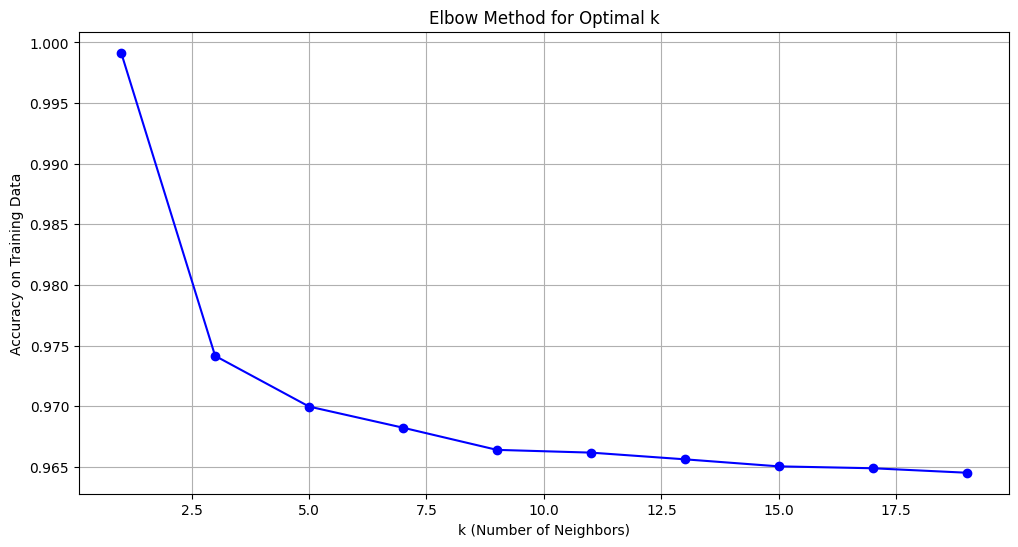

In [25]:
from sklearn.neighbors import KNeighborsClassifier

#Dùng phương pháp Elbow (Khuỷ tay) để lựa chọn số hàng xóm (k) phù hợp :
k_values = range(1,21,2)
accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_y_pred = knn.predict(X_train)
    accuracy = accuracy_score(y_train, knn_y_pred)
    accuracy_values.append(accuracy)

#Vẽ biểu đồ để xem độ chính xác trên tập huấn luyện với các giá trị khác nhau của k :
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy on Training Data')
plt.grid(True)
plt.show()

In [40]:
#Tạo mô hình KNN với giá trị tốt nhất của k :
knn_model = KNeighborsClassifier(n_neighbors= 9 , weights='distance', p=2)
knn_model.fit(X_train, y_train)

#Đưa ra dự đoán trên tập kiểm tra :
knn_y_pred = knn_model.predict(X_test)

#Ma trận nhầm lẫn :
knn_cnf_matrix = confusion_matrix(y_test, knn_y_pred)

Dùng thuật toán Naive Bayes để đưa ra dự đoán bệnh tiểu đường :

Hoạt Động của Naive Bayes:

---
 Thuật toán phân loại có giám sát, dựa trên Định lý Bayes. Ý tưởng chính của nó là dự đoán xác suất của một phần tử dữ liệu thuộc vào một lớp được sử dụng để giải quyết bài toán phân loại:
- Chọn giả định: Đầu tiên, chọn giả định về độc lập. Naive Bayes giả định rằng tất cả các thuộc tính đầu vào đều độc lập với nhau.
- Áp dụng Định lý Bayes: Naive Bayes sử dụng Định lý Bayes để tính xác suất hậu nghiệm, tức là xác suất của một sự kiện A xảy ra khi biết sự kiện B đã xảy ra. Trong bài toán phân loại, A là một phần tử dữ liệu, B là một giả thiết về lớp mà A thuộc về.
- Tính xác suất: Đối với mỗi lớp, Naive Bayes tính xác suất của mỗi thuộc tính dữ liệu thuộc về lớp đó. Xác suất này được tính dựa trên tần suất xuất hiện của thuộc tính trong lớp.
- Đưa ra dự đoán: Khi có xác suất cho mỗi lớp, Naive Bayes dự đoán lớp của một điểm dữ liệu bằng cách chọn lớp có xác suất hậu nghiệm cao nhất.

In [32]:
#Import thư viện :
from sklearn.naive_bayes import GaussianNB

#Khởi tạo mô hình Naive Bayes :
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#Đưa ra dự đoán trên tập kiểm tra :
nb_y_pred = nb_model.predict(X_test)

#Ma trận nhầm lẫn :
nb_cnf_matrix = confusion_matrix(y_test, nb_y_pred)

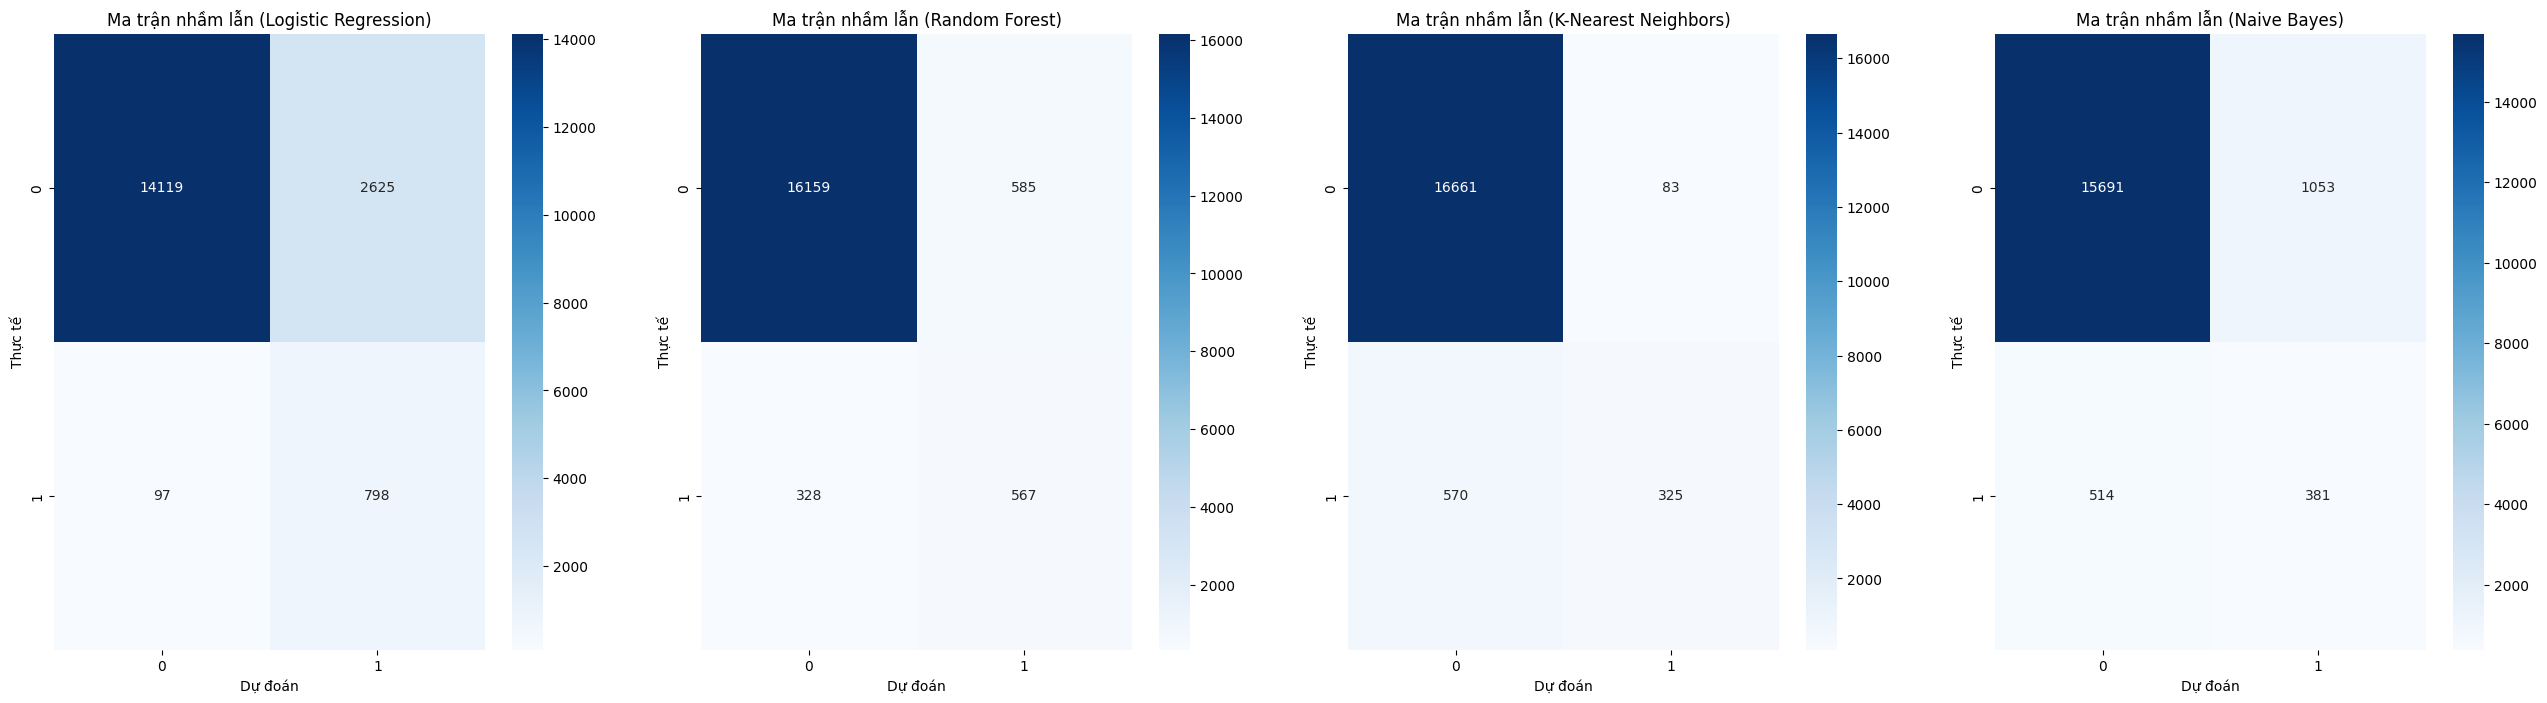


Độ chính xác của mô hình Logistic Regression :  0.85
Độ chính xác của mô hình Random Forest :  0.95
Độ chính xác của mô hình K-Nearest Neighbors :  0.96
Độ chính xác của mô hình Naive Bayes :  0.91


Logistic Regression                                    \
                       precision    recall  f1-score       support   
0                       0.993177  0.843227  0.912080  16744.000000   
1                       0.233129  0.891620  0.369616    895.000000   
accuracy                0.845683  0.845683  0.845683      0.845683   
macro avg               0.613153  0.867424  0.640848  17639.000000   
weighted avg            0.954612  0.845683  0.884556  17639.000000   

             Random Forest                                   \
                 precision    recall  f1-score      support   
0                 0.980106  0.965062  0.972526  16744.00000   
1                 0.492188  0.633520  0.553981    895.00000   
accuracy          0.948240  0.948240  0.948240      0.94824   
macro avg         0.736147  0.799291  0.763254  17639.00000   
weighted avg      0.955349  0.948240  0.951289  17639.00000   

             K_Nearest Neighbors                                  Naive Bayes  \
                       precision    recall  f1-score      support   precision   
0                       0.966920  0.995043  0.980780  16744.00000    0.968281   
1                       0.796569  0.363128  0.498849    895.00000    0.265690   
accuracy                0.962980  0.962980  0.962980      0.96298    0.911163   
macro avg               0.881744  0.679086  0.739814  17639.00000    0.616986   
weighted avg            0.958276  0.962980  0.956327  17639.00000    0.932632   

                                                
                recall  f1-score       support  
0             0.937112  0.952442  16744.000000  
1             0.425698  0.327179    895.000000  
accuracy      0.911163  0.911163      0.911163  
macro avg     0.681405  0.639810  17639.000000  
weighted avg  0.911163  0.920716  17639.000000

In [41]:
#Trực quan hoá ma trận nhầm lẫn bằng seaborn :
plt.figure(figsize=(32, 8))

#Trực quan ma trận nhầm lẫn của Logistic Regression :
plt.subplot(1,4,1)
sns.heatmap(conf_matrix_logis, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Logistic Regression)')


#Trực quan ma trận nhầm lẫn của Random Forest :
plt.subplot(1,4,2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Random Forest)')

#Trực quan ma trận nhầm lẫn của K-Nearest Neighbors :
plt.subplot(1,4,3)
sns.heatmap(knn_cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (K-Nearest Neighbors)')


#Trực quan ma trận nhầm lẫn của Naive Bayes :
plt.subplot(1,4,4)
sns.heatmap(nb_cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn (Naive Bayes)')
plt.show()
print()

#Đánh giá hiệu suất mô hình :
accuracy_logistic = accuracy_score(y_test, y_pred_logis)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, knn_y_pred)
accuracy_nb = accuracy_score(y_test, nb_y_pred)



print(f'Độ chính xác của mô hình Logistic Regression : {accuracy_logistic : .2f}')
print(f'Độ chính xác của mô hình Random Forest : {accuracy_rf : .2f}')
print(f'Độ chính xác của mô hình K-Nearest Neighbors : {accuracy_knn : .2f}')
print(f'Độ chính xác của mô hình Naive Bayes : {accuracy_nb : .2f}')

#Báo cáo phân loại của mô hình Logistic Regression :
logis_report = classification_report(y_test, y_pred_logis, output_dict=True)
df_logis_report = pd.DataFrame(logis_report).transpose()

#Báo cáo phân loại Random Forest :
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
df_rf_report = pd.DataFrame(rf_report).transpose()

#Báo cáo phân loại Random Forest :
knn_report = classification_report(y_test, knn_y_pred, output_dict=True)
df_knn_report = pd.DataFrame(knn_report).transpose()

#Báo cáo phân loại Naive Bayes :
nb_report = classification_report(y_test, nb_y_pred, output_dict=True)
df_nb_report = pd.DataFrame(nb_report).transpose()

#Kết hợp các DataFrame :
combined_df = pd.concat([df_logis_report, df_rf_report, df_knn_report,df_nb_report], keys=['Logistic Regression', 'Random Forest', 'K_Nearest Neighbors','Naive Bayes'], axis=1)

#Hiển thị kết quả :
combined_df

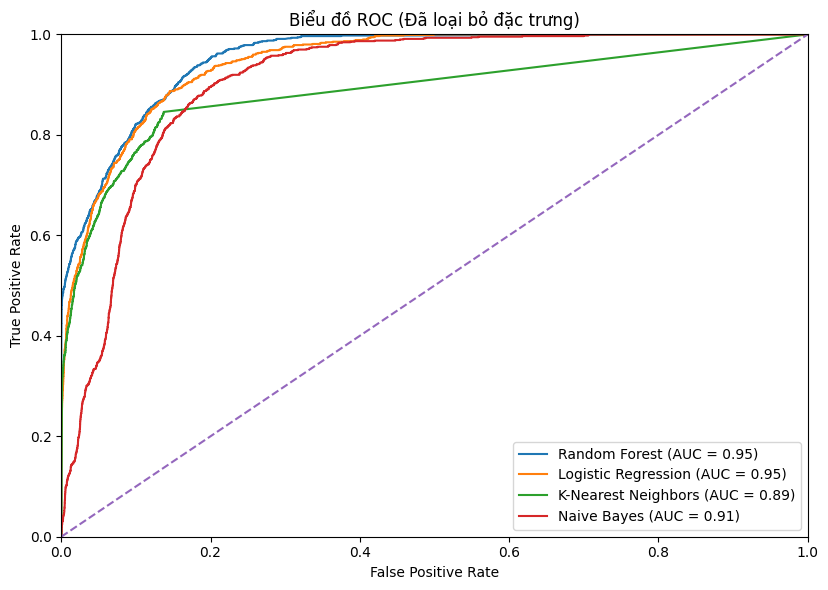

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(16, 6))

#Tính điểm ROC và đường cong ROC cho Logistic Regression:
y_pred_prob_logis = logistic_model.predict_proba(X_test)[:, 1]
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, y_pred_prob_logis)
roc_auc_logis = roc_auc_score(y_test, y_pred_prob_logis)

#Tính điểm ROC và đường cong ROC cho Random Forest:
y_pred_prob_rf = randomfs_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

#Tính điểm ROC và đường cong ROC cho K-Nearest Neighbors:
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

#Tính điểm ROC và đường cong ROC cho Naive Bayes:
y_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

#Vẽ biểu đồ ROC:
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_logis, tpr_logis, label=f'Logistic Regression (AUC = {roc_auc_logis:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Biểu đồ ROC (Đã loại bỏ đặc trưng)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
